In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False

선형 판별 분석(Linear Discriminant Analysis, LDA)  
LDA는 지도 학습적인 접근 방법을 통한 차원 축소 알고리즘으로 선형 판별 분석이라는 말의 뜻은 데이터 포인트가 속하는 클래스를 구분하는 판별 함수가 선행 형태의 함수라는 뜻이다.

데이터셋의 기존 공간으로부터 집단 간 분산과 집단 내 분산의 비율을 최대화하는 기존 공간보다 더 작은 차원의 공간으로 원래 데이터를 투영시킴으로써 차원 축소한다. 즉, 데이터를 최대한 분리해주는 기능을 한다.

LDA는 크게 3단계 과정을 거친다. 첫 번째 단계로, 집단간 거리를 계산한다. 이를 집단간 분산이라고 한다. 두 번째 단계는 각 집단의 평균과 각 데이터 포인트의 거리를 계산한다. 이를 집단 내 분산이라고 한다. 마지막 세 번째 단계는 기존 데이터셋의 공간보다 더 작은 차원의 공간을 만드는 것이다. 이 공간은 집간 간 분산을 최대화하고 집단 내 분산을 최소로 하는 공간이어야 한다.

LDA 알고리즘을 활용해 와인 종류를 분류하는 모델을 생성해본다.

In [2]:
# 데이터 불러오기
from sklearn import datasets # 사이킷런이 제공하는 데이터셋을 사용하기 위해 import 한다.
raw_wine = datasets.load_wine() # 와인 데이터를 불러온다.

In [3]:
# 피쳐, 타겟 데이터 저장
X = raw_wine.data # 피쳐 데이터를 저장한다.
y = raw_wine.target # 타겟 데이터를 저장한다.
X.shape

(178, 13)

In [4]:
# 트레이닝, 테스트 데이터 분할
from sklearn.model_selection import train_test_split # 트레이닝, 테스트 데이터 분할을 위해 import 한다.
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state=1) # 트레이닝 데이터와 테스트 데이터로 분할한다.
print(X_tn.shape, y_tn.shape, X_te.shape, y_te.shape)

(133, 13) (133,) (45, 13) (45,)


In [5]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler # 데이터 표준화를 위해 import 한다.
std_scale = StandardScaler() # 표준화 스케일러 객체를 만든다.
# 표준화는 트레이닝 데이터를 기반으로 실행하므로 트레이닝 피쳐 데이터 X_tn을 표준화 스케일러에 적합시킨다.
X_tn_std = std_scale.fit_transform(X_tn) # 트레이닝 데이터를 적합 후 표준화 한다.
X_te_std = std_scale.transform(X_te) # 테스트 데이터를 표준화 한다.

In [6]:
# LDA를 통한 차원 축소
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA 알고리즘을 사용하기 위해 import 한다.
# PCA나 커널 PCA와 같이 n_components 속성으로 차원을 설정할 수 있지만 설정할 수 있는 값이 제약된다.
# n_components 속성으로 사용 가능한 값은 기본값인 min(피쳐 개수, 클래스 개수 - 1)보다 큰 값을 지정할 수 없다.
# 와인 데이터의 피쳐는 13개이고 클래스 개수는 3개 이므로 n_components 속성값은 min(13, 3 - 1)의 결과인 2보다
# 큰 값을 지정하면 에러가 발생된다.
# n_components 속성 생략시 기존 13차원 데이터는 2차원으로 줄어들게 된다. n_components 속성을 1로 설정하면
# 1차원으로 줄어들게 된다.
lda = LinearDiscriminantAnalysis(n_components=2) # LDA 모델을 만든다.
# LDA를 실행할 때 트레이닝 데이터를 기반으로 실행하므로 표준화된 트레이닝 피쳐 데이터 X_tn_std를 LDA 모델에 
# 적합시킨 후 트레이닝 데이터의 차원을 축소한다.
X_tn_lda = lda.fit_transform(X_tn_std, y_tn)
X_te_lda = lda.transform(X_te_std) # 적합된 LDA 모델을 바탕으로 표준화된 테스트 데이터의 차원을 축소한다.

In [7]:
# 차원 축소 확인
print(X_tn_std.shape, X_tn_lda.shape, X_te_std.shape, X_te_lda.shape)

(133, 13) (133, 2) (45, 13) (45, 2)


In [10]:
# LDA 상수항, 가중 벡터 확인
print(lda.intercept_) # 상수항
print(lda.coef_) # 가중 벡터, 가중 벡터의 차원은 클래스 개수 * 피쳐 개수로 나타난다.

[ -9.49063922  -3.6792656  -10.65310672]
[[ 2.11536841  0.34171834  1.60756274 -2.62777005 -0.02954383 -1.92461007
   5.43612614  0.30142527 -0.66723405 -2.08948728  0.53569108  3.06011656
   5.45318503]
 [-1.18707715 -0.97635273 -1.64104916  1.19614378  0.22114803  0.2969019
   1.13721801  0.4338713   0.33425086 -1.57541361  0.56544507 -0.17730553
  -2.34856045]
 [-0.59547207  1.01875252  0.59754164  1.13544231 -0.28238675  1.65463974
  -7.48134065 -0.94177595  0.24492236  4.49319245 -1.38150969 -3.04974421
  -2.54627163]]


차원 축소된 데이터 시각화

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
lda_columns = ['lda_comp1', 'lda_comp2']
X_tn_lda_df = pd.DataFrame(X_tn_lda, columns=lda_columns)
X_tn_lda_df['target'] = y_tn
X_tn_lda_df

,lda_comp1,lda_comp2,target
0,2.563293,-0.503212,0
1,0.646015,-2.169761,1
2,3.981901,1.621584,0
3,5.956216,3.878140,0
4,4.047839,2.335699,0
...,...,...,...
128,-3.519877,0.440679,2
129,-4.457515,0.491287,2
130,-0.639263,-1.684700,1
131,-2.440212,1.168633,2


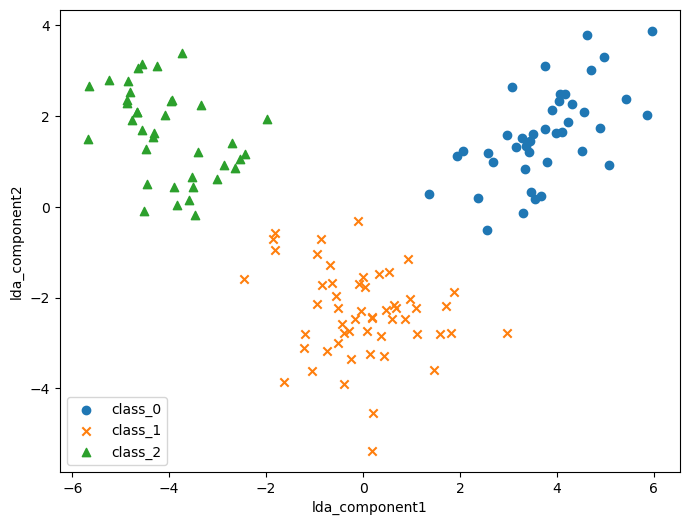

In [12]:
plt.figure(figsize=[8, 6])
markers = ['o', 'x', '^']

for index, marker in enumerate(markers):
    df_index = X_tn_lda_df[X_tn_lda_df.target == index]
    target_index = raw_wine.target_names[index]
    X1 = df_index.lda_comp1
    X2 = df_index.lda_comp2
    plt.scatter(X1, X2, marker=marker, label=target_index)

plt.xlabel('lda_component1')
plt.ylabel('lda_component2')
plt.legend()
plt.show()

LDA 적용 전 데이터 학습

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf_rf = RandomForestClassifier(max_depth=2, random_state=0)
clf_rf.fit(X_tn_std, y_tn)
pred_rf = clf_rf.predict(X_te_std)
accuracy = accuracy_score(y_te, pred_rf)
print(accuracy)

0.9777777777777777


LDA 적용 후 데이터 학습

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf_rf_lda = RandomForestClassifier(max_depth=2, random_state=0)
clf_rf_lda.fit(X_tn_lda, y_tn)
pred_rf_lda = clf_rf_lda.predict(X_te_lda)
accuracy = accuracy_score(y_te, pred_rf_lda)
print(accuracy)

1.0
